# Data Exploration

In [180]:
import pandas as pd
df = pd.read_csv('drivingdata.csv')

In [181]:
df.head(2)

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Filtered_Accelerator_Pedal_value,Absolute_throttle_position,Engine_soacking_time,Inhibition_of_engine_fuel_cut_off,Engine_in_fuel_cut_off,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,0,13.3,3,0,0,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,0,13.7,3,0,0,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1


In [182]:
df.columns

Index(['Fuel_consumption', 'Accelerator_Pedal_value',
       'Throttle_position_signal', 'Short_Term_Fuel_Trim_Bank1',
       'Intake_air_pressure', 'Filtered_Accelerator_Pedal_value',
       'Absolute_throttle_position', 'Engine_soacking_time',
       'Inhibition_of_engine_fuel_cut_off', 'Engine_in_fuel_cut_off',
       'Fuel_Pressure', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed',
       'Engine_torque_after_correction', 'Torque_of_friction',
       'Flywheel_torque_(after_torque_interventions)', 'Current_spark_timing',
       'Engine_coolant_temperature', 'Engine_Idel_Target_Speed',
       'Engine_torque', 'Calculated_LOAD_value',
       'Minimum_indicated_engine_torque', 'Maximum_indicated_engine_torque',
       'Flywheel_torque', 'Torque_scaling_factor(standardization)',
       'Standard_Torque_Ratio', 'Requested_spark_retard_angle_from_TCU',
       'TCU_requests_engine_torque_limit_(ETL)',
       'TCU_requested_engine_RPM_increase',
       'Target_engine_speed_used_in_lock-up_modu

In [183]:
df['Class'].value_counts()

Class
D    13244
B    12864
F    11012
H     9880
J     8904
E     8436
I     7808
C     7500
G     7492
A     7240
Name: count, dtype: int64

## Deleting redundant features

In [184]:
# Exists of only one value
columns_same_value = ['Filtered_Accelerator_Pedal_value',
                      'Inhibition_of_engine_fuel_cut_off',
                      'Fuel_Pressure',
                      'Torque_scaling_factor(standardization)',
                      'Glow_plug_control_request']

# Identical/extremely similar columns
columns_double = ['Engine_torque_after_correction']

df = df.drop(labels=columns_same_value + columns_double, axis=1)

In [185]:
df.head()

,Fuel_consumption,Accelerator_Pedal_value,Throttle_position_signal,Short_Term_Fuel_Trim_Bank1,Intake_air_pressure,Absolute_throttle_position,Engine_soacking_time,Engine_in_fuel_cut_off,Long_Term_Fuel_Trim_Bank1,Engine_speed,...,Acceleration_speed_-_Longitudinal,Indication_of_brake_switch_ON/OFF,Master_cylinder_pressure,Calculated_road_gradient,Acceleration_speed_-_Lateral,Steering_wheel_speed,Steering_wheel_angle,Time(s),Class,PathOrder
0,268.8,0.0,5.2,0.0,33,13.3,3,0,-0.8,929,...,-8.5,1,325.5,0.0,-8.8,0,-3.4,1,A,1
1,243.2,0.0,6.1,0.0,40,13.7,3,0,-0.8,726,...,0.1,1,0.9,0.0,-0.2,0,-3.6,2,A,1
2,217.6,0.0,5.2,0.0,41,13.7,3,0,-0.8,685,...,0.1,1,0.9,0.0,-0.2,0,-3.6,3,A,1
3,204.8,0.0,4.7,0.0,38,13.3,3,0,-0.8,675,...,0.1,1,0.9,0.0,-0.2,0,-3.6,4,A,1
4,217.6,0.0,5.7,0.0,40,13.7,3,0,-0.8,716,...,0.1,1,0.9,0.0,-0.2,0,-3.5,5,A,1


## Feature Selection 

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Class'], axis=1), df['Class'], test_size=0.3)

In [187]:
print(X_train.shape)
print(y_train.shape)

(66066, 47)
(66066,)


In [188]:
from sklearn.feature_selection import mutual_info_classif
MI = mutual_info_classif(X_train, y_train)
MI

array([4.98631041e-02, 6.88945875e-02, 7.00376916e-02, 1.45469924e-02,
       1.85443348e-01, 7.14665991e-02, 8.98790757e-01, 5.66511372e-03,
       4.63483038e-01, 4.39237895e-02, 2.29523678e-01, 5.65304486e-02,
       4.44059463e-02, 7.63669812e-02, 5.46759451e-02, 6.40148762e-02,
       6.25221341e-02, 1.35400131e-02, 1.69489432e-01, 5.58080898e-02,
       4.87607805e-03, 2.49517288e-04, 2.27159993e-03, 3.06898421e-03,
       2.98195483e-03, 9.76338998e-02, 4.95399659e-02, 4.56706526e-02,
       4.51347731e-01, 5.44095257e-02, 4.84463873e-02, 5.15271561e-02,
       5.37676725e-02, 4.84408934e-02, 7.26715162e-03, 4.43225874e-03,
       2.28688255e-02, 5.02640634e-02, 1.08287664e-02, 5.34947732e-03,
       9.35253448e-02, 2.40193646e-02, 1.98288059e-02, 1.78204092e-02,
       8.75163465e-02, 0.00000000e+00, 0.00000000e+00])

In [189]:
MI2 = pd.Series(MI)
MI2.index = X_train.columns
MI2.sort_values(ascending=False)[:13]

# Niet:
# fuel_consumption
# calculated_load_value
# wheel velocity 3x
# torque_converter_speed

Engine_soacking_time               0.898791
Long_Term_Fuel_Trim_Bank1          0.463483
Engine_coolant_temperature.1       0.451348
Torque_of_friction                 0.229524
Intake_air_pressure                0.185443
Maximum_indicated_engine_torque    0.169489
Activation_of_Air_compressor       0.097634
Master_cylinder_pressure           0.093525
Steering_wheel_angle               0.087516
Engine_coolant_temperature         0.076367
Absolute_throttle_position         0.071467
Throttle_position_signal           0.070038
Accelerator_Pedal_value            0.068895
dtype: float64

<Axes: >

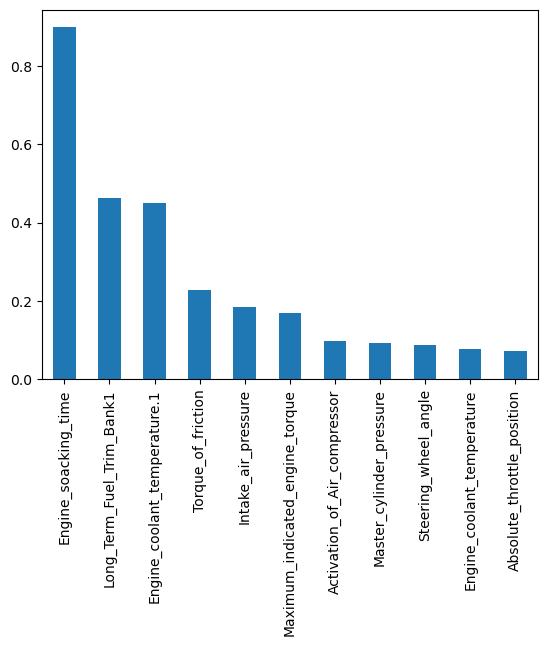

In [190]:
MI2.sort_values(ascending=False)[:11].plot(kind='bar')

In [191]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [192]:
classifier_rf.oob_score_

0.6334725880180425

In [193]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [194]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [195]:
y_pred_test = rf_best.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [197]:
accuracy_score(y_test, y_pred_test)

0.9873560782651691

In [198]:
confusion_matrix(y_test, y_pred_test)

array([[2128,    0,    0,    0,    0,    0,    3,    0,    0,    0],
       [   2, 3815,    0,    5,    2,    5,    0,   11,    0,    0],
       [   1,    1, 2178,   64,    0,    0,    0,    1,    7,    0],
       [   0,   15,   16, 4008,    1,   24,    1,    0,    8,    2],
       [   0,    0,    0,    0, 2469,    0,    0,    0,    0,    1],
       [   0,    5,    0,    0,    6, 3326,    0,    0,    0,    0],
       [   2,    2,    4,    6,    0,    0, 2241,    1,    2,    0],
       [   0,   28,    0,    3,    0,    0,    0, 2862,    0,    0],
       [   3,    1,    2,    4,    0,    0,    0,    2, 2221,  108],
       [   0,    0,    1,    0,    1,    0,    1,    0,    6, 2708]])

In [199]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2131
           B       0.99      0.99      0.99      3840
           C       0.99      0.97      0.98      2252
           D       0.98      0.98      0.98      4075
           E       1.00      1.00      1.00      2470
           F       0.99      1.00      0.99      3337
           G       1.00      0.99      1.00      2258
           H       0.99      0.99      0.99      2893
           I       0.99      0.95      0.97      2341
           J       0.96      1.00      0.98      2717

    accuracy                           0.99     28314
   macro avg       0.99      0.99      0.99     28314
weighted avg       0.99      0.99      0.99     28314



<Axes: >

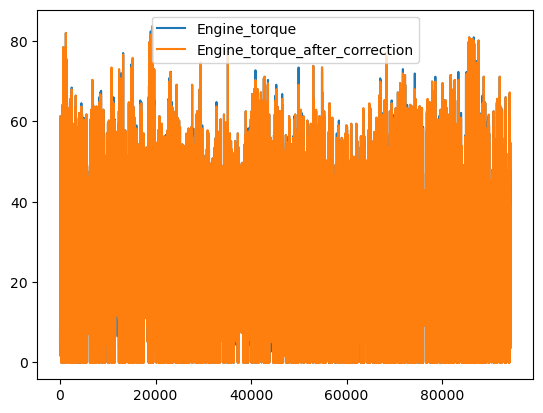

In [11]:
# df.plot(x='Engine_torque', y='Engine_torque_after_correction', style='o')
df.plot(y=['Engine_torque', 'Engine_torque_after_correction'], kind='line')


<Axes: >

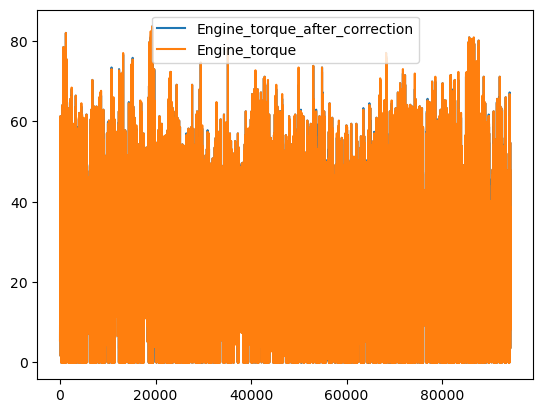

In [12]:
df.plot(y=['Engine_torque_after_correction', 'Engine_torque'], kind='line')

So engine_torque not exactly the same as engine_torque_after_correction, but almost